# **Power-Consumption India-State wise**
Kriti Sachan

**Importing Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import geopandas as gpd

**Importing Dataset**

In [25]:
data = pd.read_csv('Power_Consumption.csv')

In [26]:
data.head()

,datetime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02-01-2019 00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03-01-2019 00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04-01-2019 00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05-01-2019 00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06-01-2019 00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [27]:
data.tail()

,datetime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
498,01-12-2020 00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02-12-2020 00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03-12-2020 00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04-12-2020 00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3
502,05-12-2020 00:00,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3


In [28]:
data.shape

(503, 34)

**Data Preprocessing and Feature Engineering**

In [29]:
data.isnull().sum()

datetime             0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [30]:
data.fillna(method='ffill', inplace=True)

In [31]:
# Generate lag features (example: 1 day lag)
for state in data.columns[1:]:
    data[f'{state}_lag1'] = data[state].shift(1)

# Drop rows with NaN values generated by shifting
data.dropna(inplace=True)


print(data.head())


           datetime  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand  \
1  03-01-2019 00:00   121.9    133.5      240.2   85.5  311.8         39.3   
2  04-01-2019 00:00   118.8    128.2      239.8   83.5  320.7         38.1   
3  05-01-2019 00:00   121.0    127.5      239.1   79.2  299.0         39.2   
4  06-01-2019 00:00   121.4    132.6      240.4   76.6  286.8         39.2   
5  07-01-2019 00:00   118.0    132.1      241.9   71.1  294.2         40.1   

     HP   J&K  Chandigarh  ...  Odisha_lag1  West Bengal_lag1  Sikkim_lag1  \
1  30.1  54.1         4.9  ...         70.2             108.2          2.0   
2  30.1  53.2         4.8  ...         67.9             110.2          1.9   
3  30.2  51.5         4.3  ...         66.3             106.8          1.7   
4  31.0  53.2         4.3  ...         65.8             107.0          2.0   
5  30.1  53.3         4.0  ...         62.9             106.4          2.0   

   Arunachal Pradesh_lag1  Assam_lag1  Manipur_lag1  Meghalaya

In [32]:
# Parse datetime
data['datetime'] = pd.to_datetime(data['datetime'], format="%d-%m-%Y %H:%M", dayfirst=True)

# Extract datetime features
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['is_weekend'] = data['day_of_week'] >= 5

In [33]:
data.head()

,datetime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Meghalaya_lag1,Mizoram_lag1,Nagaland_lag1,Tripura_lag1,year,month,day,hour,day_of_week,is_weekend
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,6.1,1.9,2.2,3.4,2019,1,3,0,3,False
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,6.5,1.8,2.2,3.6,2019,1,4,0,4,False
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,6.3,1.7,2.2,3.5,2019,1,5,0,5,True
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,5.7,1.8,2.3,3.5,2019,1,6,0,6,True
5,2019-01-07,118.0,132.1,241.9,71.1,294.2,40.1,30.1,53.3,4.0,...,6.2,1.9,2.3,3.3,2019,1,7,0,0,False


**Plotting State-wise electricity consumption over time**

**Plotting State direction wise for easy understanding**

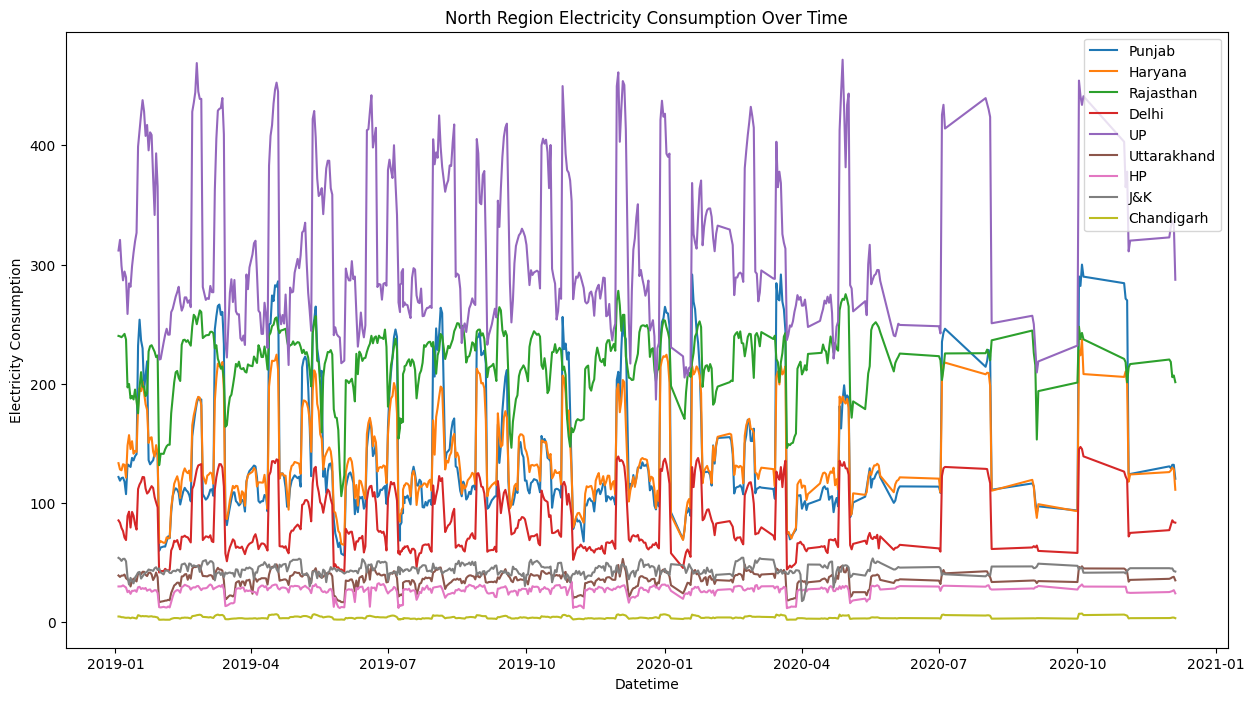

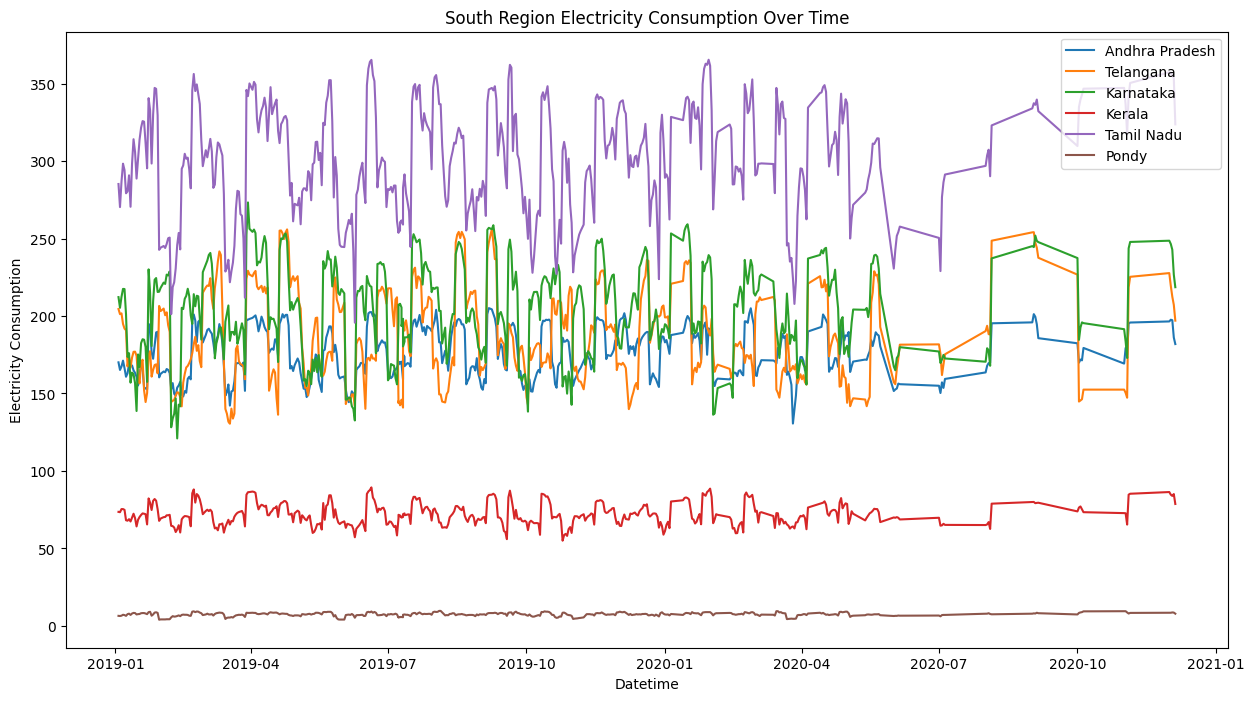

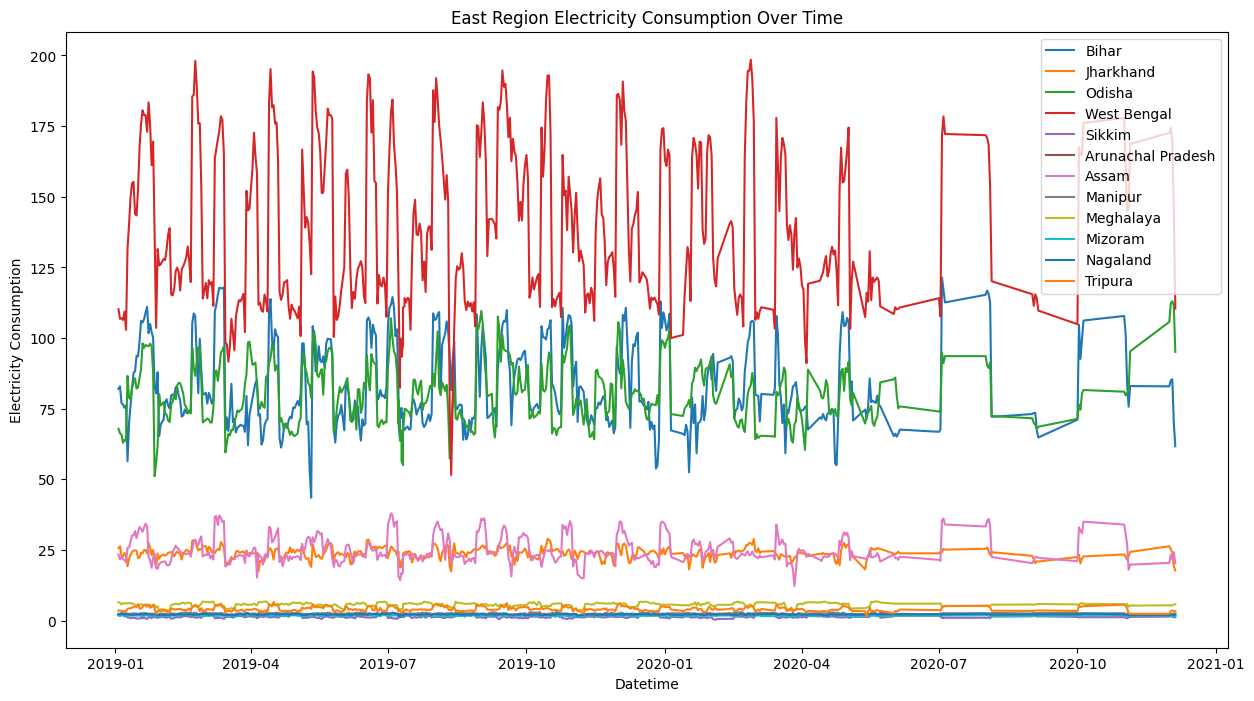

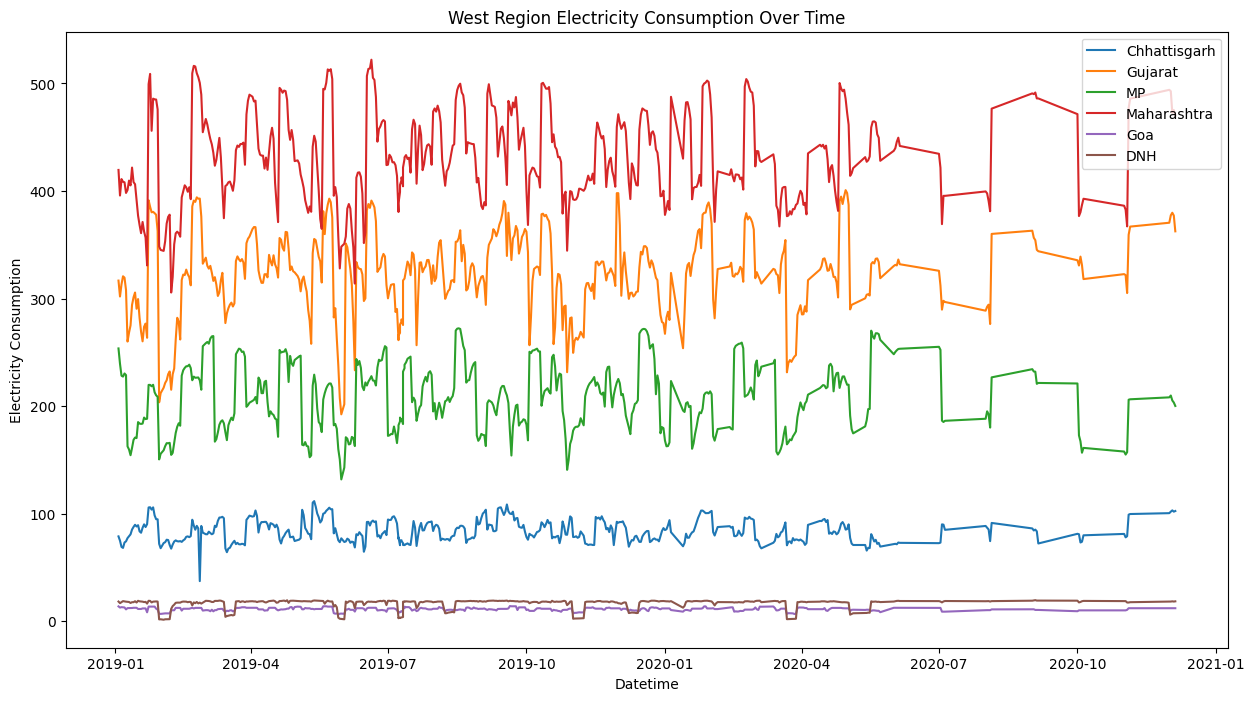

In [34]:
regions = {
    'North': ['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh'],
    'South': ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy'],
    'East': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
    'West': ['Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DNH']
}
for region, states in regions.items():
    plt.figure(figsize=(15, 8))
    for state in states:
        plt.plot(data['datetime'], data[state], label=state)
    plt.title(f'{region} Region Electricity Consumption Over Time')
    plt.xlabel('Datetime')
    plt.ylabel('Electricity Consumption')
    plt.legend(loc='upper right')
    plt.show()

**Training and testing data**

In [35]:
X = data[['year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend'] + [f'{state}_lag1' for state in states]]
y = data[states]

In [36]:
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [37]:
X_train

,year,month,day,hour,day_of_week,is_weekend,Chhattisgarh_lag1,Gujarat_lag1,MP_lag1,Maharashtra_lag1,Goa_lag1,DNH_lag1
1,2019,1,3,0,3,False,78.7,319.5,253.0,428.6,12.8,18.6
2,2019,1,4,0,4,False,78.8,316.7,253.6,419.6,13.7,18.2
3,2019,1,5,0,5,True,74.8,301.9,239.3,395.8,12.6,16.7
4,2019,1,6,0,6,True,69.0,313.2,228.2,411.1,13.0,17.6
5,2019,1,7,0,0,False,68.1,320.7,227.4,408.6,12.9,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...
397,2020,2,22,0,5,True,79.3,327.3,259.0,412.5,9.4,17.5
398,2020,2,23,0,6,True,81.8,315.6,253.7,401.3,9.5,17.3
399,2020,2,24,0,0,False,96.3,373.2,208.7,497.2,10.7,18.4
400,2020,2,25,0,1,False,95.4,379.4,209.7,504.1,10.7,18.5


In [38]:
X_test

,year,month,day,hour,day_of_week,is_weekend,Chhattisgarh_lag1,Gujarat_lag1,MP_lag1,Maharashtra_lag1,Goa_lag1,DNH_lag1
402,2020,2,27,0,3,False,97.0,376.2,213.5,496.2,10.7,18.3
403,2020,2,28,0,4,False,95.4,374.2,217.3,492.4,10.7,18.1
404,2020,2,29,0,5,True,95.0,370.7,213.2,491.6,10.7,18.2
405,2020,3,1,0,6,True,94.1,364.2,206.1,479.3,11.2,17.9
406,2020,3,2,0,0,False,75.2,318.9,238.3,422.9,12.7,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020,12,1,0,1,False,99.6,366.9,206.3,485.9,12.0,17.6
499,2020,12,2,0,2,False,100.4,370.5,208.1,494.1,12.0,18.1
500,2020,12,3,0,3,False,101.8,377.4,209.8,492.8,12.0,18.2
501,2020,12,4,0,4,False,103.0,379.8,205.2,472.8,12.0,18.4


In [39]:
y_train

,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH
1,78.8,316.7,253.6,419.6,13.7,18.2
2,74.8,301.9,239.3,395.8,12.6,16.7
3,69.0,313.2,228.2,411.1,13.0,17.6
4,68.1,320.7,227.4,408.6,12.9,18.6
5,73.1,319.4,230.3,408.1,12.7,18.3
...,...,...,...,...,...,...
397,81.8,315.6,253.7,401.3,9.5,17.3
398,96.3,373.2,208.7,497.2,10.7,18.4
399,95.4,379.4,209.7,504.1,10.7,18.5
400,95.2,373.5,210.6,501.8,10.7,18.5


In [40]:
y_test

,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH
402,95.4,374.2,217.3,492.4,10.7,18.1
403,95.0,370.7,213.2,491.6,10.7,18.2
404,94.1,364.2,206.1,479.3,11.2,17.9
405,75.2,318.9,238.3,422.9,12.7,18.6
406,75.8,324.5,242.4,437.2,11.0,18.9
...,...,...,...,...,...,...
498,100.4,370.5,208.1,494.1,12.0,18.1
499,101.8,377.4,209.8,492.8,12.0,18.2
500,103.0,379.8,205.2,472.8,12.0,18.4
501,101.8,377.2,203.3,475.3,12.0,18.2


**Training model : Random Forest**

In [41]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

**Model Prediction**

In [42]:
y_pred = model.predict(X_test)
y_pred.shape

(101, 6)

**Model Evaluation**

In [43]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
f'MAE: {mae}, RMSE: {rmse}'

'MAE: 8.879334983498508, RMSE: 16.072062612943036'

**Feature Importance**

In [44]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importances

MP_lag1              0.309822
Maharashtra_lag1     0.301650
Gujarat_lag1         0.186898
Chhattisgarh_lag1    0.054307
Goa_lag1             0.037559
day                  0.036971
DNH_lag1             0.026295
month                0.019605
day_of_week          0.019403
is_weekend           0.003807
year                 0.003683
hour                 0.000000
dtype: float64

In [50]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data

data.fillna(method='ffill', inplace=True)

# Generate lag features (example: 1 day lag)
for col in data.columns[1:]:
    data[f'{col}_lag1'] = data[col].shift(1)
data.dropna(inplace=True)

# Parse datetime
data['datetime'] = pd.to_datetime(data['datetime'], format="%d-%m-%Y %H:%M", dayfirst=True)

# Extract datetime features
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['is_weekend'] = data['day_of_week'] >= 5

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['datetime']))

# Function to create sequences
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i + sequence_length]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 24  # 24 hours
X, y = create_sequences(scaled_data, sequence_length)

**Training and testing datasets**

In [46]:
# Split the data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Building the LSTM model**

In [47]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test)

# Rescale the predictions and actual values
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'MAE: {mae}, RMSE: {rmse}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 24, 50)            32400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 111)               5661      
                                                                 
Total params: 58261 (227.58 KB)
Trainable params: 58261 (227.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
11/11 [==============================] - 6s 140ms/step - loss: 0.2584 - val_loss: 0.1857
Epoch 2/20
11/11 [==============================] - 0s 30ms/step - loss: 0.1116 - val_loss: 0.0817
Epoch 3/20
11/11 [==============================] - 0s 31ms/step - loss: 0.0547 -

**Plotiing the model**

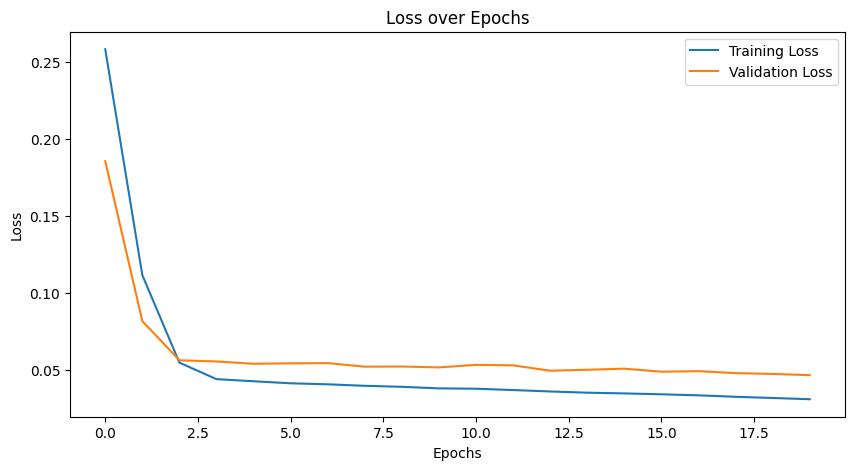

In [48]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
